### Packages
Load the required packages & libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



### Load the Dataset
- Load and Display the dataset
- Drop Unnecessary column

In [31]:
df = pd.read_csv("laptop_pricing_dataset.csv")  #loading the dataset

df.head() #Print some part of the dataset
df.info() #Display basic info

df.drop(columns=["Unnamed: 0"], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


### Data Preprocessing
- Define Features (X) and Target Variable (Y) then Identify Categorical and Numerical columns
- Create a Data Preprocessing Pipeline
- Split data into training and testing sets then apply Preprocessing to the data

In [32]:
# Defining X and Y
X = df.drop(columns=["Price"])
Y = df["Price"]

#Selecting categorical & numerical columns
categorical_cols = ["Manufacturer", "Screen"]
numerical_cols = ["Category", "GPU", "OS", "CPU_core", "Screen_Size_cm", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg"]

# Data Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),  # Fill missing values with column mean
        ("scaler", StandardScaler())  # Standardize numerical features (mean = 0, std = 1)
    ]), numerical_cols),
    
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)  # Convert categorical to numeric
])

# Split data into train & test then apply preprocessing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

### Data Visualization
Contains visual representation of the data such as :
- Correlation Heatmaps
- Histograms
- Scatterplots


Correlation Matrix:


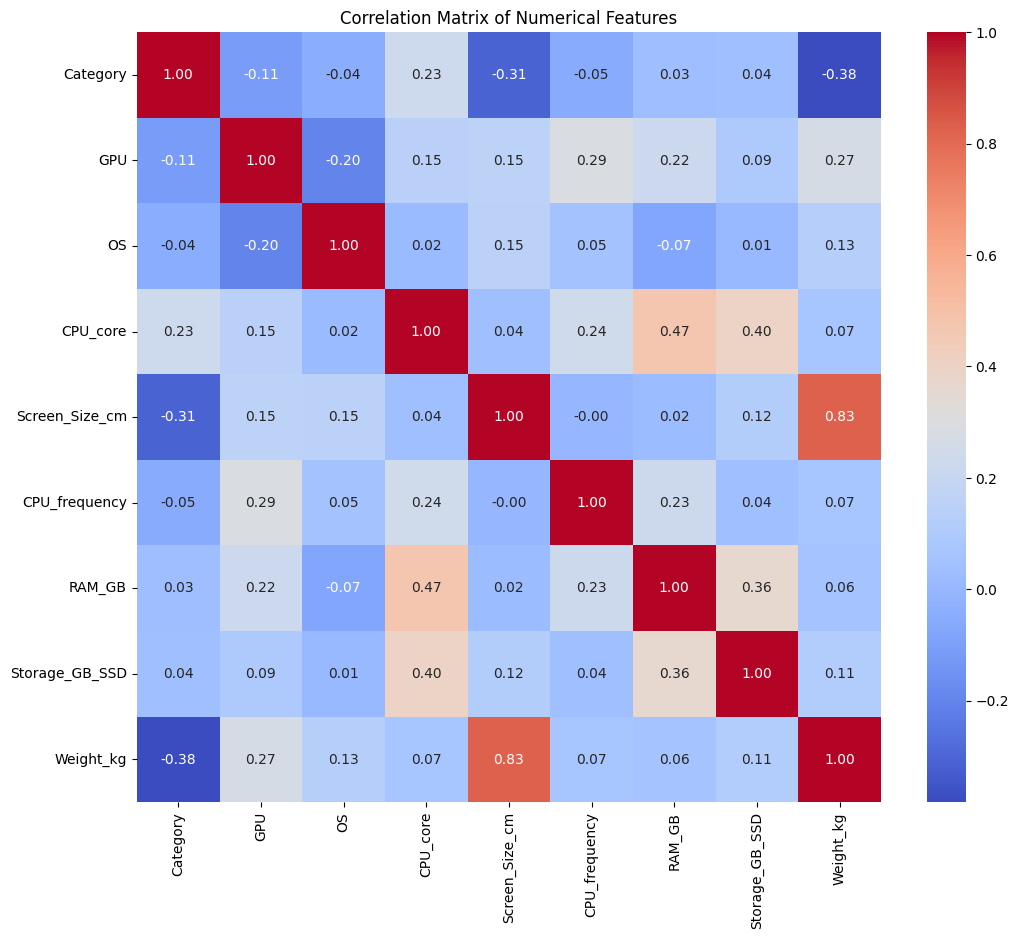


Histogram(s)


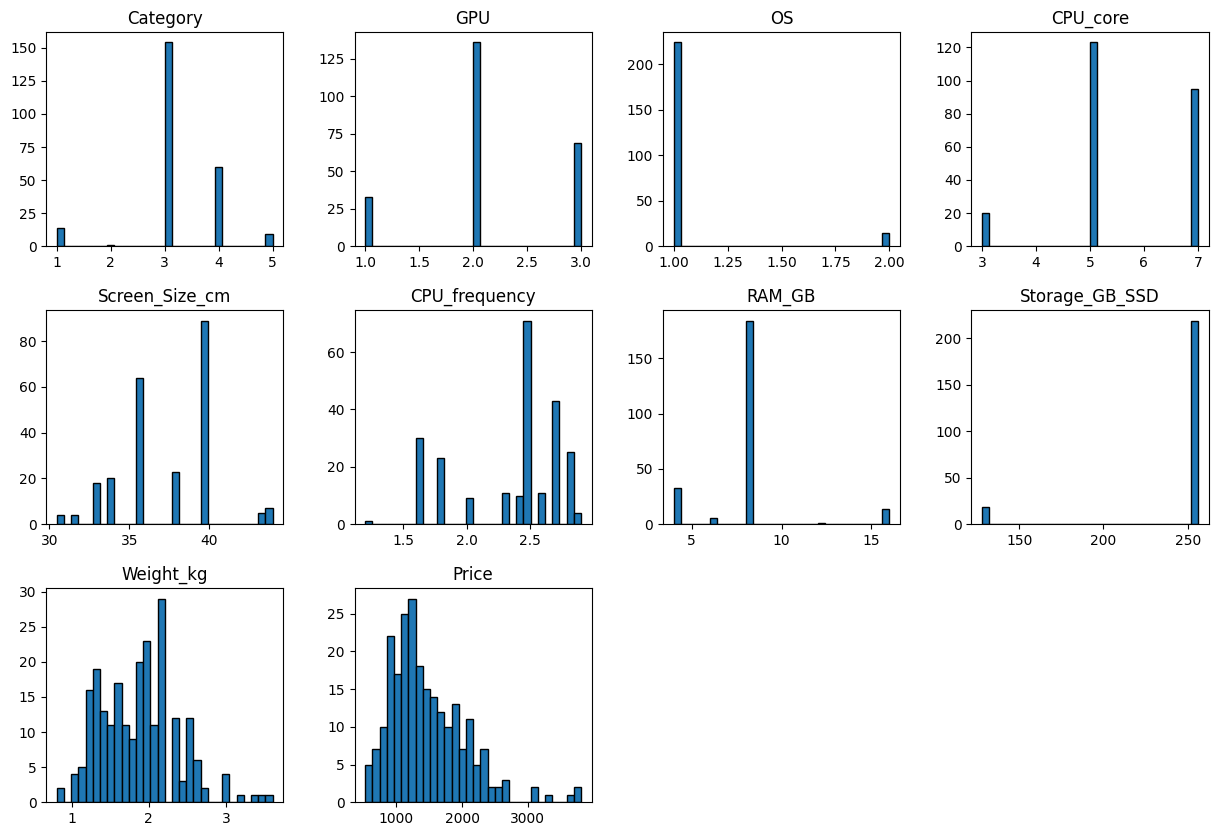


Scatter Plot(s)


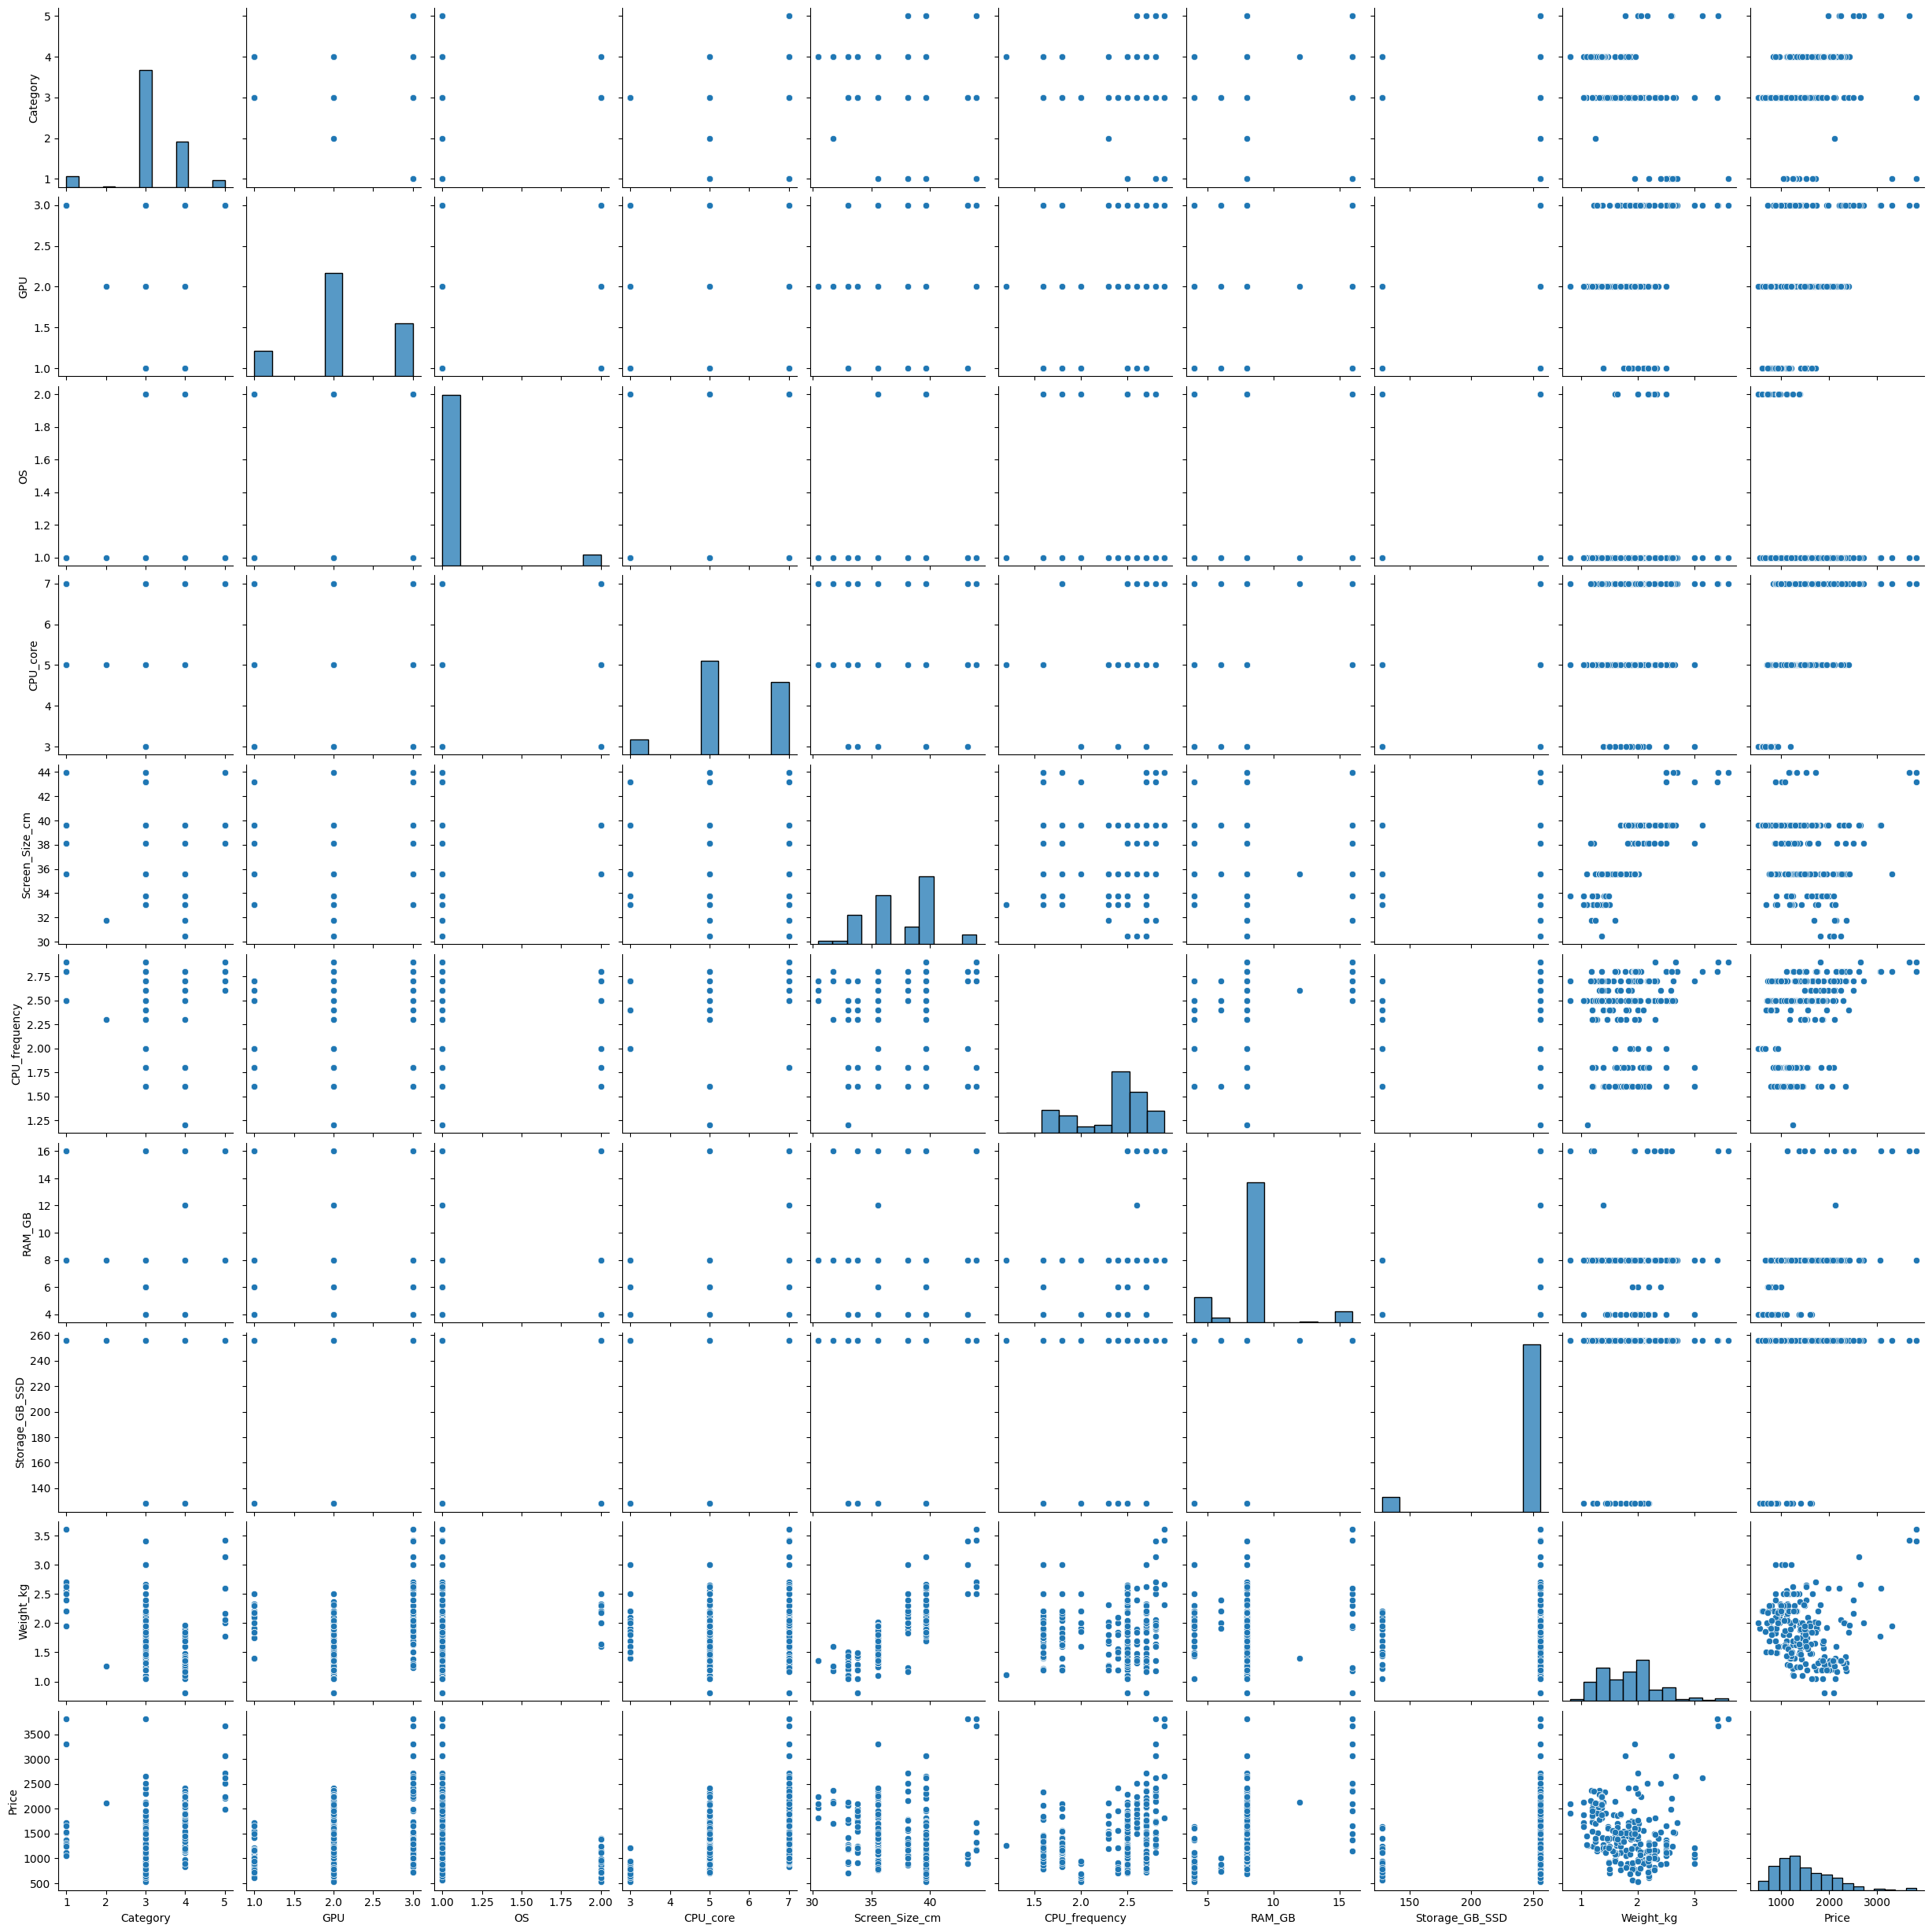

In [38]:
# Correlation Matrix
print("\nCorrelation Matrix:")
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Historgram
print("\nHistogram(s)")
df.hist(figsize=(15, 10), edgecolor='black', bins=30, grid=False, layout=(3, 4))
plt.show()

#Scatter Plot
print("\nScatter Plot(s)")
sns.pairplot(df)
plt.show()

### Parameters & Train-test loss
- Initialize Model Parameters & set Hyperparameters
- Track training and testing loss

In [4]:
# Initialize model parameters
m, n = X_train_transformed.shape
theta = np.zeros(n)  # Initialize weights to zero
bias = 0  # Bias term

# Hyperparameters
learning_rate = 0.01
iterations = 100

# Store loss values
train_losses, test_losses = [], []


### Gradient Descent Implementation

- Compute Predictions
- Calculate Mean Squared Error (MSE)
- Train the model & update values

In [5]:
# Gradient Descent Implementation
for _ in range(iterations):
    # Compute Predictions
    Y_train_pred = X_train_transformed.dot(theta) + bias
    Y_test_pred = X_test_transformed.dot(theta) + bias

    # Compute Cost (MSE)
    train_loss = np.mean((Y_train_pred - Y_train) ** 2)
    test_loss = np.mean((Y_test_pred - Y_test) ** 2)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Compute Gradients
    d_theta = (2/m) * X_train_transformed.T.dot(Y_train_pred - Y_train)
    d_bias = (2/m) * np.sum(Y_train_pred - Y_train)

    # Update Parameters
    theta -= learning_rate * d_theta
    bias -= learning_rate * d_bias

### Loss Curve & R² score
- Plot loss curve 
- Find final model performance using R² score

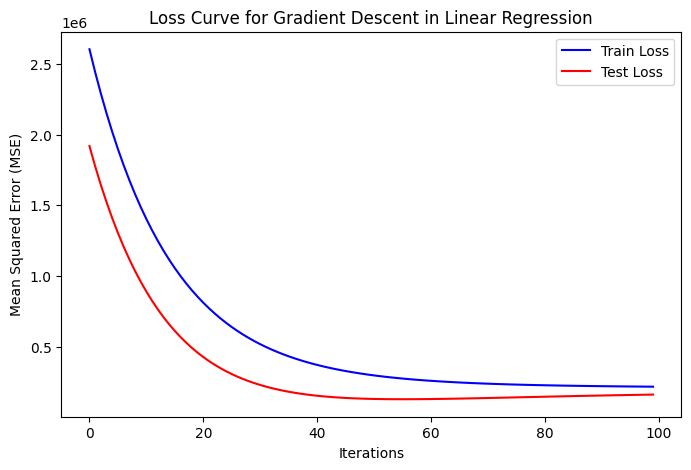

  R-squared: 0.233


In [14]:
# Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss", color="blue")
plt.plot(test_losses, label="Test Loss", color="red")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Curve for Gradient Descent in Linear Regression")
plt.legend()
plt.show()

# Evaluate final model performance using R² score
final_model = LinearRegression()
final_model.fit(X_train_transformed, Y_train)
r2_score = final_model.score(X_test_transformed, Y_test)
print(f"  R-squared: {r2_score:.3f}")

### Decision Tree
 Use Decision Tree model
- Train model and make predictions
- Compute RMSE

In [26]:
# Initialize models
dt_model = DecisionTreeRegressor(random_state=42)

# Train models
dt_model.fit(X_train_transformed, Y_train)

# Predict on test data
Y_pred_dt = dt_model.predict(X_test_transformed)

# Compute RMSE & R-squared
mse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))
print(f"Decision Tree MSE: {mse_dt}")
dt_r2 = final_model.score(X_test_transformed, Y_test)
print(f"R-squared: {dt_r2:.3f}")

Decision Tree MSE: 439.52335688789054
R-squared: 0.233


### Random Forest
 Use Random Forest model
- Train model and make predictions
- Compute RMSE

In [27]:
# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
rf_model.fit(X_train_transformed, Y_train)

# Predict on test data
Y_pred_rf = rf_model.predict(X_test_transformed)

# Compute RMSE
mse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print(f"Random Forest MSE: {mse_rf}")
rf_r2 = final_model.score(X_test_transformed, Y_test)
print(f"R-squared: {rf_r2:.3f}")

Random Forest MSE: 401.39677493127897
R-squared: 0.233


### Linear Regression
 Use Linear Regression
- Train model and make predictions
- Compute RMSE

In [28]:
# Initialize models
lr_model = LinearRegression()

# Train models
lr_model.fit(X_train_transformed, Y_train)

# Predict on test data
Y_pred_lr = lr_model.predict(X_test_transformed)

# Compute RMSE
mse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))
print(f"Linear Regression MSE: {mse_lr}")
lr_r2 = final_model.score(X_test_transformed, Y_test)
print(f"R-squared: {lr_r2:.3f}")

Linear Regression MSE: 420.3113716682984
R-squared: 0.233


### Comparison and Selection of best model

In [23]:
best_model = min(
    [("Linear Regression", rmse_lr), 
     ("Decision Tree", rmse_dt), 
     ("Random Forest", rmse_rf)],
    key=lambda x: x[1]  # Sort by lowest MSE
)[0]

print(f"Best performing model based of smallest MSE: {best_model}")

Best performing model based of smallest MSE: Random Forest


### Making a persisting model
we do that for our Random Forest model by using joblib 

In [24]:
joblib.dump(rf_model, "random_forest_model.pkl")

['random_forest_model.pkl']

In [25]:
# Load dataset
file_path = "laptop_pricing_dataset.csv"
df = pd.read_csv(file_path)
df.drop(columns=["Unnamed: 0"], inplace=True)

# Define features and target
categorical_cols = ["Manufacturer", "Screen"]
numerical_cols = ["Screen_Size_cm", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg"]
target_column = "Price"

X = df.drop(columns=[target_column])
y = df[target_column]
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]), numerical_cols),
        
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Initialize and train Random Forest model
model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
model.fit(X_train_transformed, y_train)

# Save model and preprocessor
model_path = "random_forest_model.pkl"
preprocessor_path = "preprocessor.pkl"

joblib.dump(model, model_path)
joblib.dump(preprocessor, preprocessor_path)

['preprocessor.pkl']